# Analyse des Verhaltens von Benutzer 21

Das Verhalten des definierten Benutzers wird nachfolgend im Kontext verschiedener Merkmale und Zeiträume betrachtet.

**Vermutlicher Status**
Angehöriger des Hochschulpersonals

### Definition des Benutzers

In [1]:
specified_user = 21

### Import von Bibliotheken und anderen Erweiterungen

In [2]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [3]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [4]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [5]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [6]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [7]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer bestimmten userid
moodle_data = moodle_data[moodle_data.userid == specified_user]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
1629,0,0,21,-2,sent,\core\event\notification_sent,notifications,3360705,2020-10-30 09:08:03,,0
1630,0,0,21,-2,sent,\core\event\notification_sent,notifications,3360706,2020-10-30 09:08:03,,0
1631,0,0,21,-2,sent,\core\event\notification_sent,notifications,3360710,2020-10-30 09:08:03,,0
1632,0,0,21,-2,sent,\core\event\notification_sent,notifications,3360725,2020-10-30 09:08:05,,0
1633,0,0,21,-2,sent,\core\event\notification_sent,notifications,3360728,2020-10-30 09:08:05,,0
...,...,...,...,...,...,...,...,...,...,...,...
967461,27841,0,21,0,updated,\core\event\course_module_updated,course_modules,963819,2021-06-03 13:56:26,etherpad,1399
967462,27841,0,21,0,viewed,\core\event\course_viewed,,0,2021-06-03 13:56:26,,0
967463,27841,0,21,0,viewed,\mod_etherpad\event\course_module_viewed,etherpad,1399,2021-06-03 13:56:30,,0
967471,27841,0,21,0,viewed,\core\event\course_viewed,,0,2021-06-03 13:58:42,,0


### Menge der unterschiedlichen Werte pro Tabellenmerkmal

In [8]:
attributes = moodle_data.nunique()
display(attributes)

courseid                19
Studiengang              4
userid                   1
relateduserid           75
action                  10
eventname               40
objecttable             24
objectid              3947
timecreated           3243
course_module_type       9
instanceid              24
dtype: int64

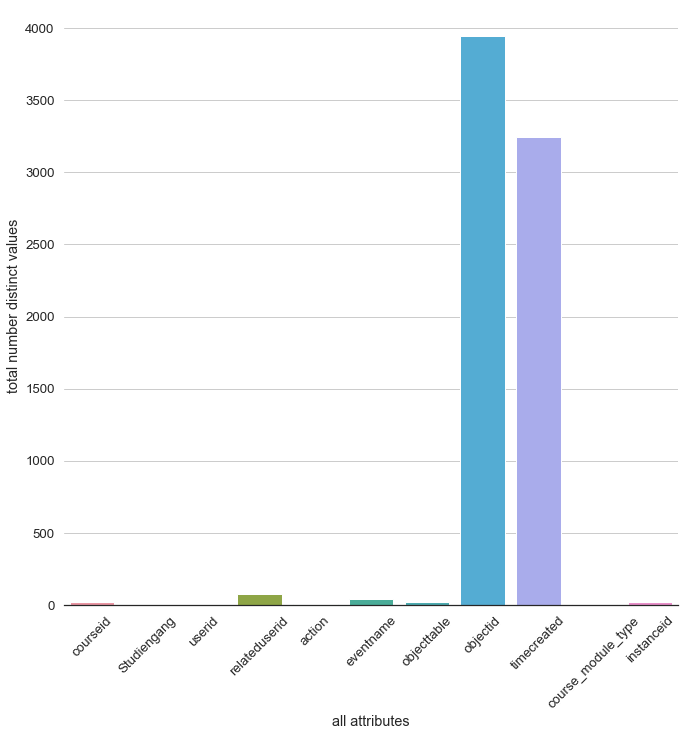

In [9]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
result = attributes
# Visualisierung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Studiengang

In [10]:
studies = moodle_data.Studiengang.groupby(moodle_data.Studiengang).count()
display(studies)

Studiengang
0    24016
1       73
2      164
4      342
Name: Studiengang, dtype: int64

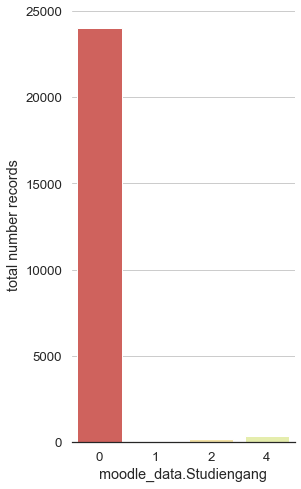

In [11]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(studies.count(), 8)) # Größe der Visualisierung (in inch)

# Ermittlung der Menge der Log-Einträge pro Studiengang
result = studies
# Visualisierung der Menge der Log-Einträge pro Studiengang
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.Studiengang')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Kurs

In [12]:
courses = moodle_data.courseid.groupby(moodle_data.courseid).count()
display(courses.sort_values())

courseid
3247         3
1746         3
18293        9
1745        18
629         34
19615       36
26742       39
1750        42
4286        44
1315        81
2466       136
4236       146
4245       164
4238       165
1731       183
4237       342
4212       911
27841      988
0        21251
Name: courseid, dtype: int64

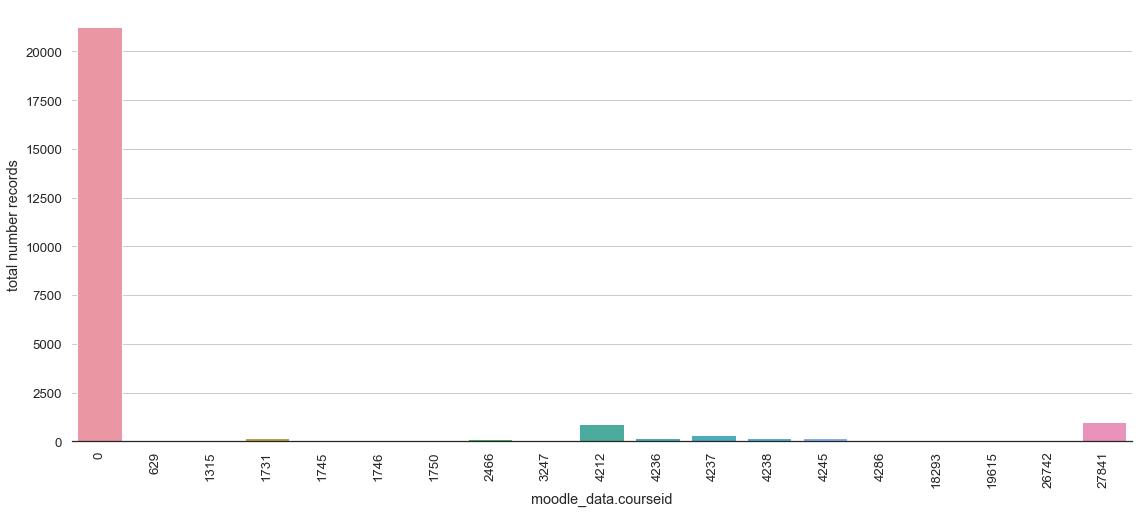

In [13]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(courses.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Kurs
result = courses
# Visualisierung der Menge der Log-Einträge pro Kurs
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Action

In [14]:
actions = moodle_data.action.groupby(moodle_data.action).count()
display(actions)

action
created        152
deleted          8
failed        1110
loggedin      1645
loggedout     1461
sent         14371
submitted       15
updated        116
uploaded        71
viewed        5646
Name: action, dtype: int64

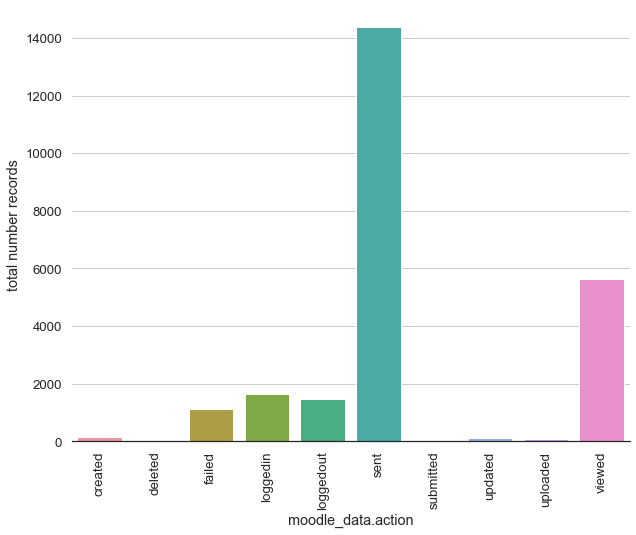

In [15]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(actions.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Action
result = actions
# Visualisierung der Menge der Log-Einträge pro Action
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.action')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Eventname

In [16]:
eventtypes = moodle_data.eventname.groupby(moodle_data.eventname).count()
display(eventtypes)

eventname
\core\event\calendar_event_created               10
\core\event\calendar_event_updated               23
\core\event\course_category_viewed                7
\core\event\course_module_created                68
\core\event\course_module_deleted                 8
\core\event\course_module_updated                67
\core\event\course_section_updated                8
\core\event\course_viewed                      1478
\core\event\dashboard_viewed                   2657
\core\event\grade_item_created                    3
\core\event\grade_item_updated                    3
\core\event\notification_sent                 14371
\core\event\user_list_viewed                    126
\core\event\user_loggedin                      1645
\core\event\user_loggedout                     1461
\core\event\user_login_failed                  1110
\core\event\user_profile_viewed                  60
\mod_assign\event\course_module_viewed            3
\mod_assign\event\submission_status_viewed        3
\m

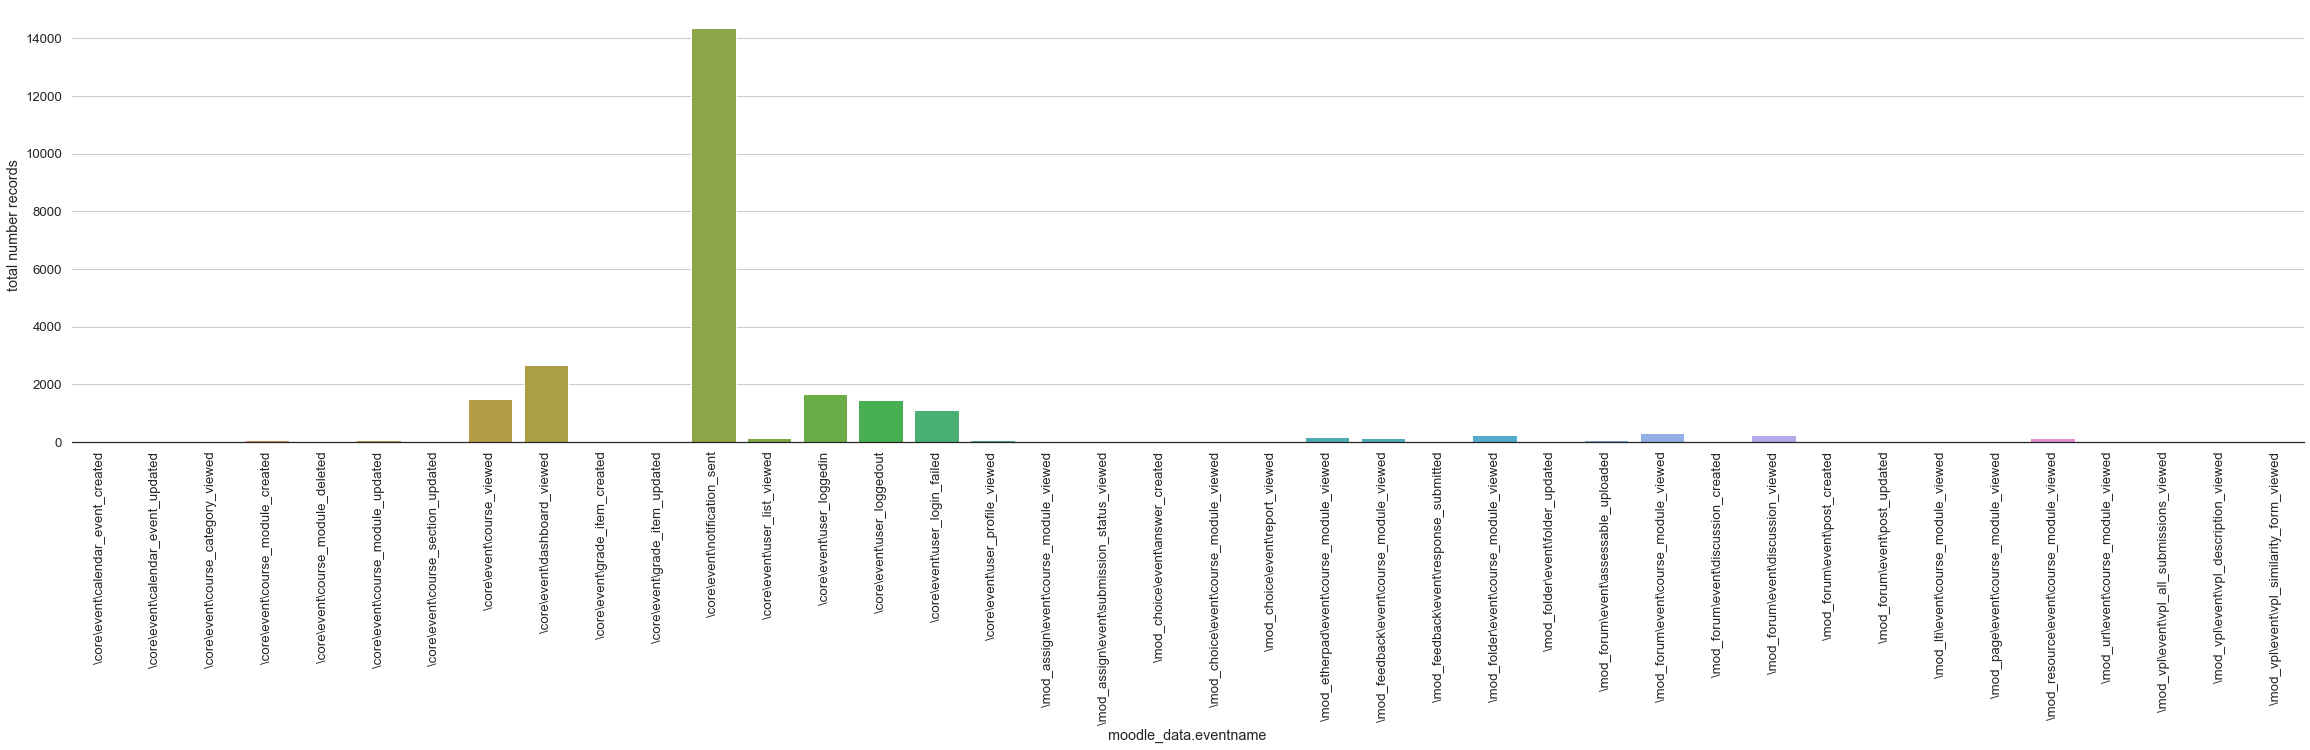

In [17]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(eventtypes.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Eventname
result = eventtypes
# Visualisierung der Menge der Log-Einträge pro Eventname
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.eventname')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Objecttable

In [18]:
objecttables = moodle_data.objecttable.groupby(moodle_data.objecttable).count()
display(objecttables)

objecttable
                       5248
assign                    3
choice                   27
choice_answers            3
course                  126
course_categories         7
course_modules          143
course_sections           8
etherpad                156
event                    33
feedback                136
feedback_completed       15
folder                  240
forum                   298
forum_discussions       276
forum_posts             116
grade_items               6
lti                       3
notifications         14371
page                      3
resource                131
url                      39
user                   3166
vpl                      41
Name: objecttable, dtype: int64

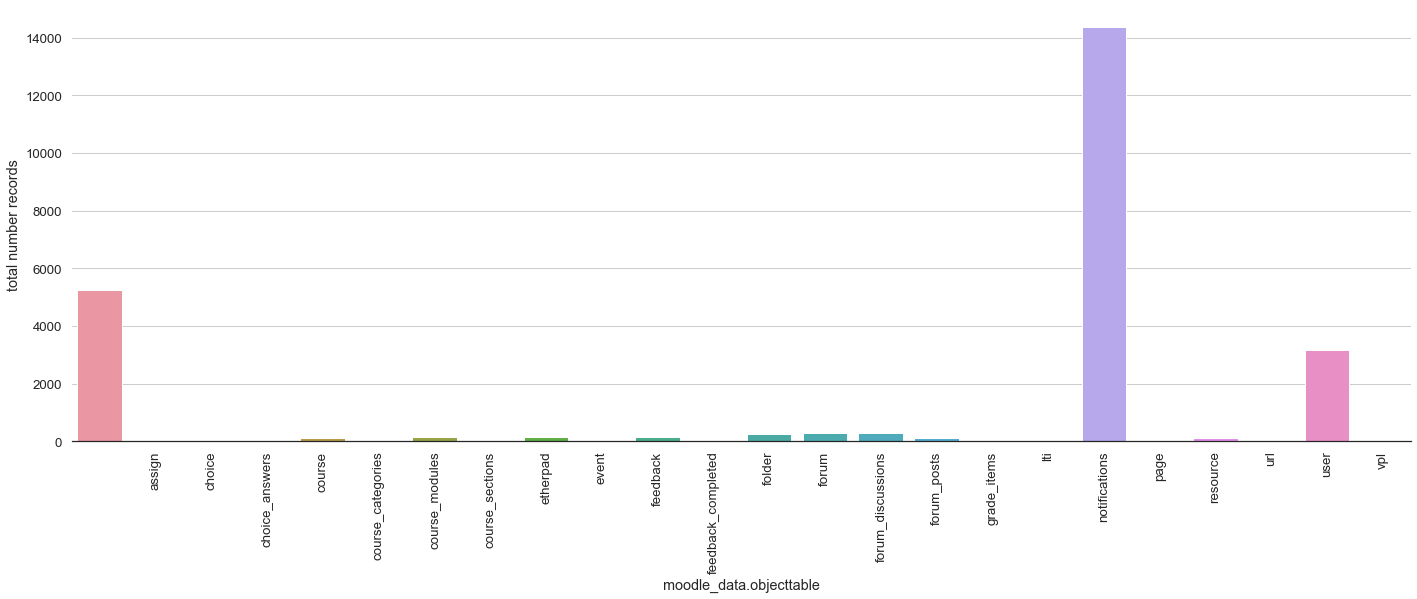

In [19]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(objecttables.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Objecttable
result = objecttables
# Visualisierung der Menge der Log-Einträge pro Objecttable
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.objecttable')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Coursemoduletype

In [20]:
course_module_types = moodle_data.course_module_type.groupby(moodle_data.course_module_type).count()
display(course_module_types)

course_module_type
            24452
choice          3
etherpad       16
feedback       33
folder          4
forum           4
resource       56
url            24
vpl             3
Name: course_module_type, dtype: int64

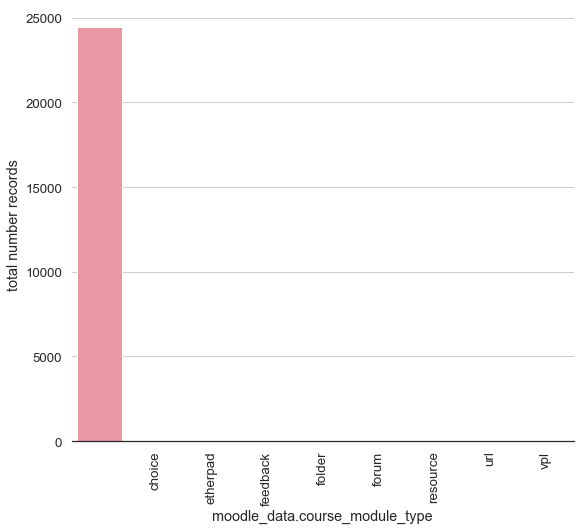

In [21]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(course_module_types.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Coursemoduletype
result = course_module_types
# Visualisierung der Menge der Log-Einträge pro Coursemoduletype
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.course_module_type')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Tagesstunde

In [22]:
# Ausgabe der Tagesstunden der protokollierten Log-Einträge
hours_per_day = moodle_data.timecreated.dt.hour.sort_values()
display(hours_per_day)

480382     0
492723     0
508300     0
536793     0
536792     0
          ..
385124    23
385125    23
385126    23
358043    23
362760    23
Name: timecreated, Length: 24595, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde**

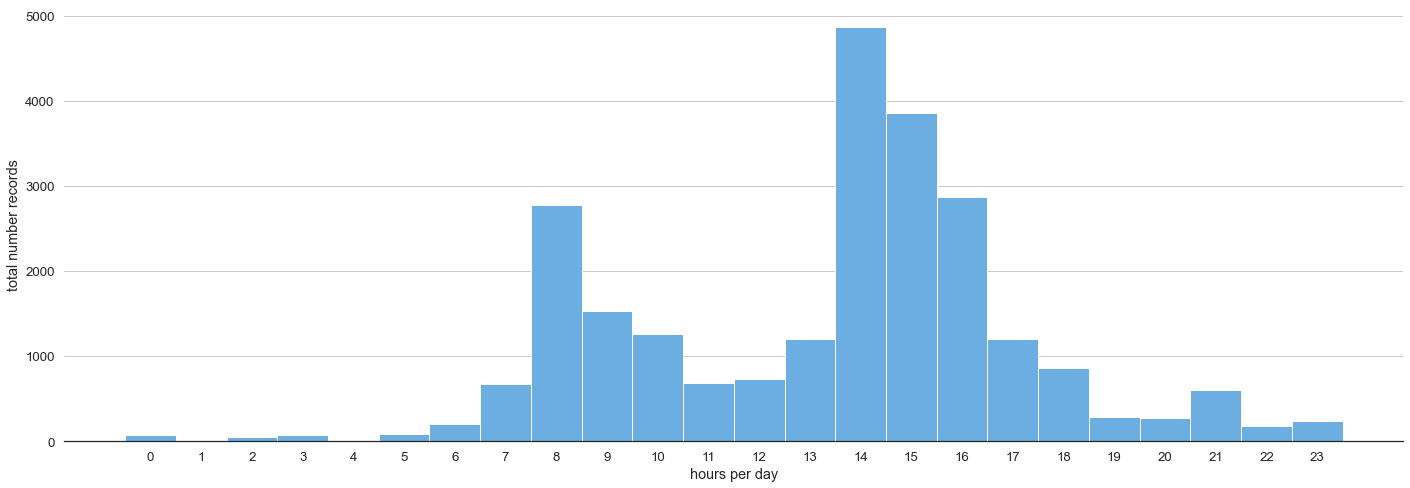

In [23]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde
chart = sns.histplot(hours_per_day, bins=24, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang**

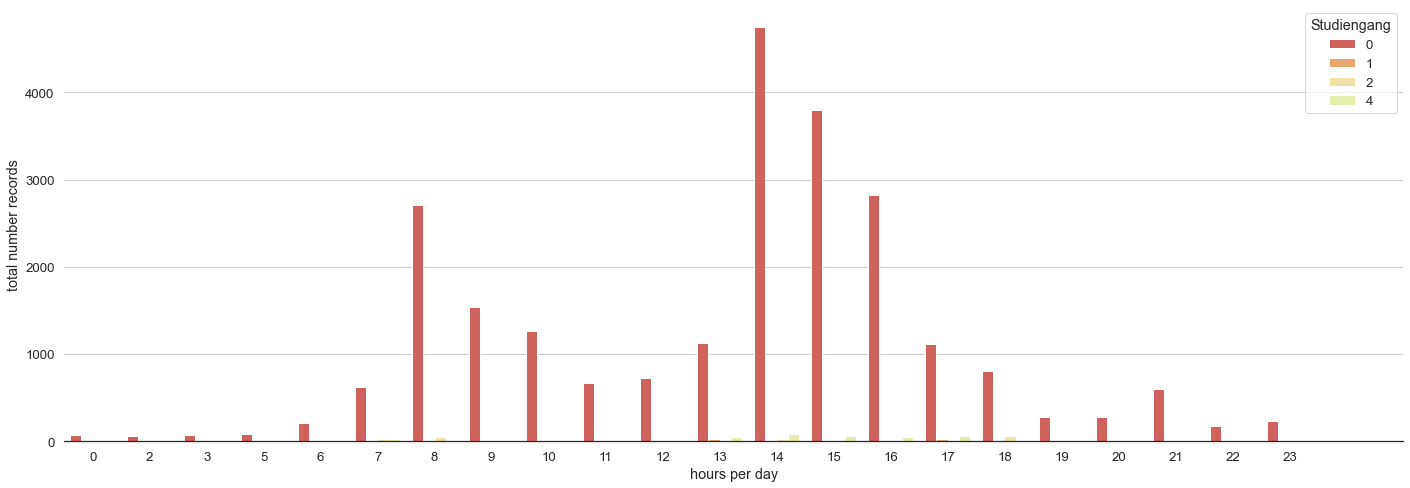

In [24]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang
chart = sns.countplot(x=hours_per_day, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden**

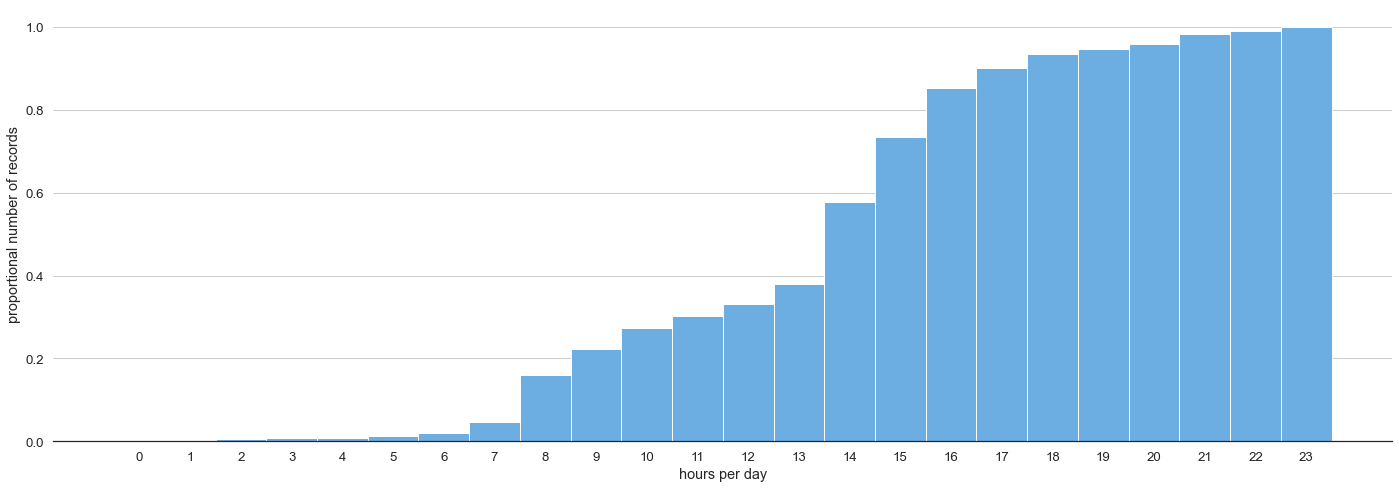

In [25]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden
chart = sns.histplot(hours_per_day, bins=24, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden**

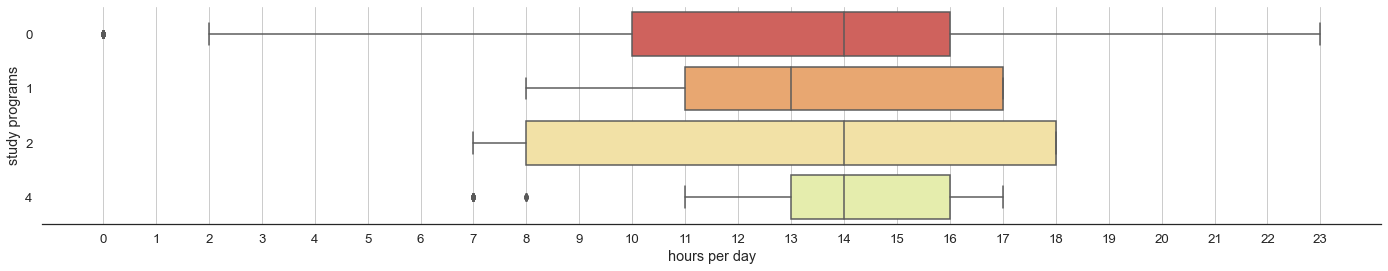

In [26]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, studies.count()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden**

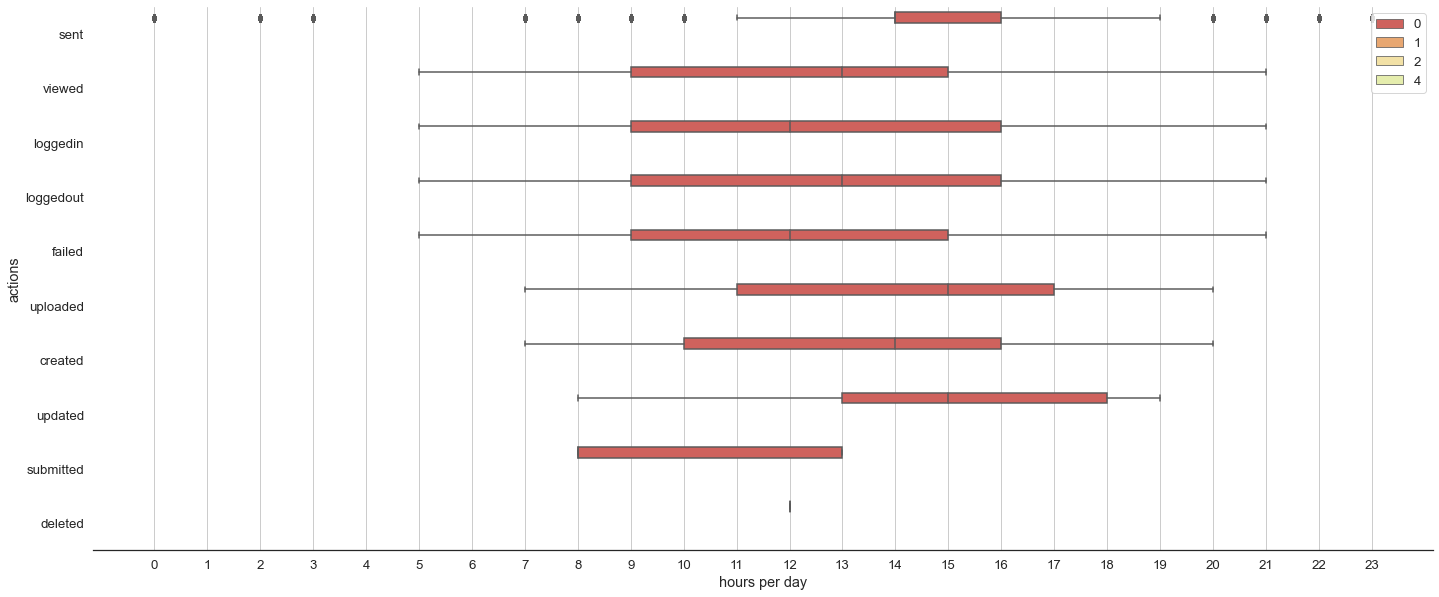

In [27]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Wochentag

In [28]:
# Ausgabe der Wochentage der protokollierten Log-Einträge
days_per_week = moodle_data.timecreated.dt.weekday.sort_values()
display(days_per_week)

692460    0
300040    0
300039    0
300038    0
300037    0
         ..
322446    6
323848    6
323849    6
321622    6
321799    6
Name: timecreated, Length: 24595, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag**

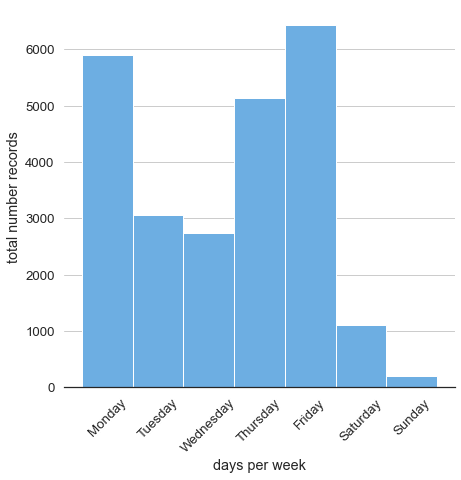

In [29]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag
chart = sns.histplot(days_per_week, bins=7, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang**

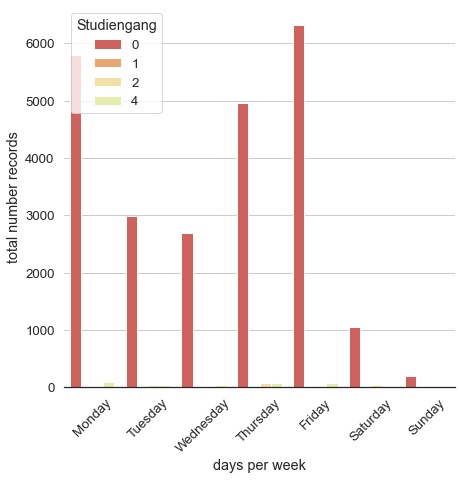

In [30]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang
chart = sns.countplot(x=days_per_week, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage**

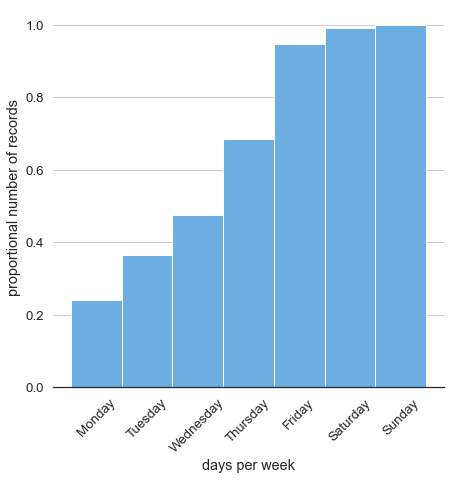

In [31]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage
chart = sns.histplot(days_per_week, bins=7, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage**

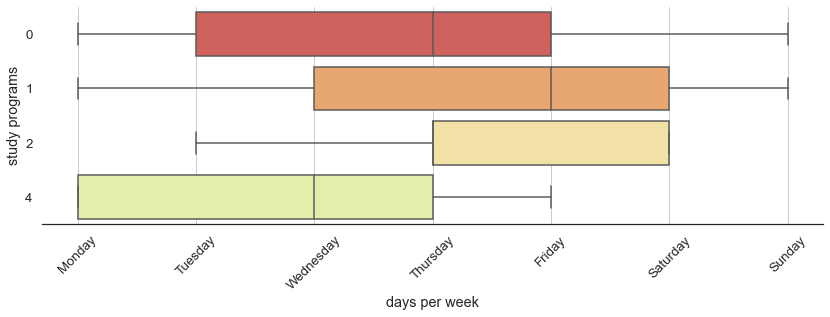

In [32]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, studies.count()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage**

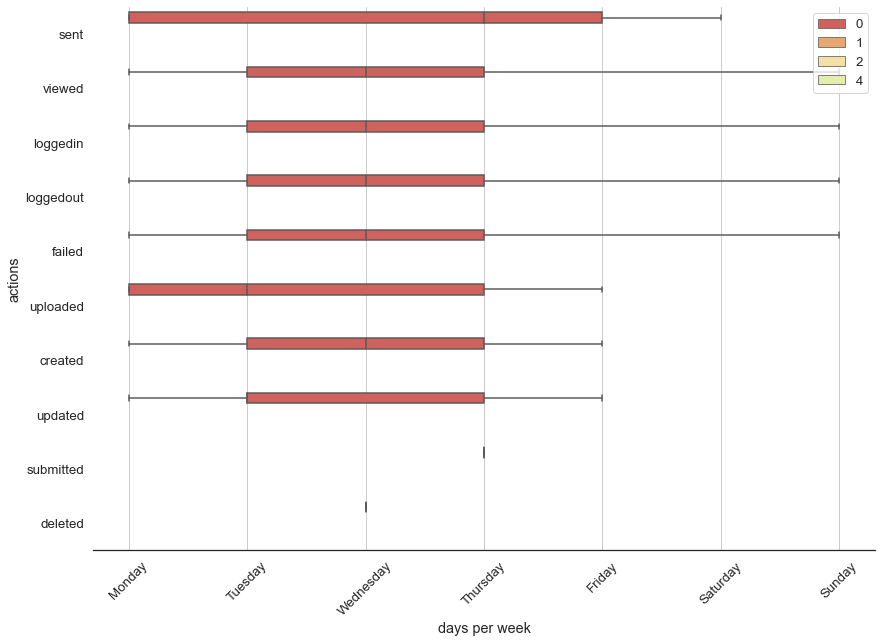

In [33]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()